<a href="https://colab.research.google.com/github/algoritmosdenegociacion/modulo2/blob/main/M2_L2_An%C3%A1lisis_T%C3%A9cnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 2
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.


#### 1.1. Instalan las librerías que no incluye Google Colab

In [ ]:
pip install yfinance

#### 1.2. Se cargan las librerías necesarias

In [ ]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Datos
import yfinance as yfin

# Gráficos 
import matplotlib.pyplot as plt

## 2. Obtención de datos históricos


https://finance.yahoo.com/

In [ ]:
# Descargamos datos de 1 años de la acción de Tesla
df = yfin.download('TSLA', data_source='yahoo', start='2020-01-01', end='2021-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...
2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800


In [ ]:
# Descargamos datos de 1 años de S&P 500
df2 = yfin.download('^GSPC', data_source='yahoo', start='2020-01-01', end='2021-01-01')
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000


##3. Análisis Técnico - Acción (TSLA) versus Mercado (S&P 500) 

In [ ]:
df['Close_100'] = 100*df['Close']/df['Close'][0]
df

,Open,High,Low,Close,Adj Close,Volume,Close_100
Date,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,100.000000
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,102.963319
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,104.945843
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,109.017797
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,114.382001
...,...,...,...,...,...,...,...
2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600,769.035007
2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600,771.266196
2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800,773.938985


In [ ]:
df2['Close_100'] = 100*df2['Close']/df2['Close'][0]
df2

,Open,High,Low,Close,Adj Close,Volume,Close_100
Date,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000,100.000000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000,99.294013
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000,99.644856
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000,99.365527
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000,99.852662
...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000,113.665760
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000,114.657212
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000,114.401827


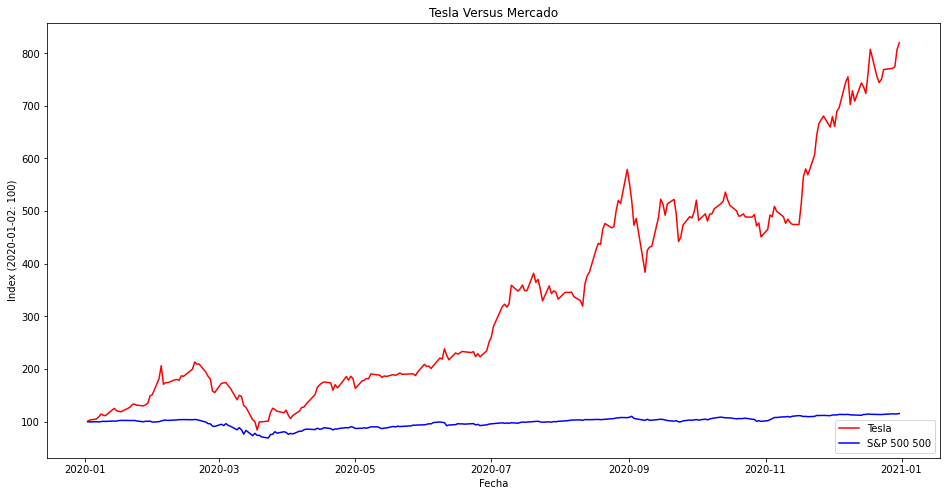

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('Tesla Versus Mercado')
plt.plot(df['Close_100'], color='red')
plt.plot(df2['Close_100'], color='blue')
plt.xlabel('Fecha')
plt.ylabel('Index (2020-01-02: 100)')
plt.legend(['Tesla', 'S&P 500 500'],loc='lower right',)
plt.show()

## 4. Análisis Técnico - Velas Japonesas

https://pypi.org/project/mplfinance/

In [ ]:
pip install mplfinance

     |████████████████████████████████| 62 kB 829 kB/s 


In [ ]:
# Importar libreria de mplfinance
import mplfinance as mpf

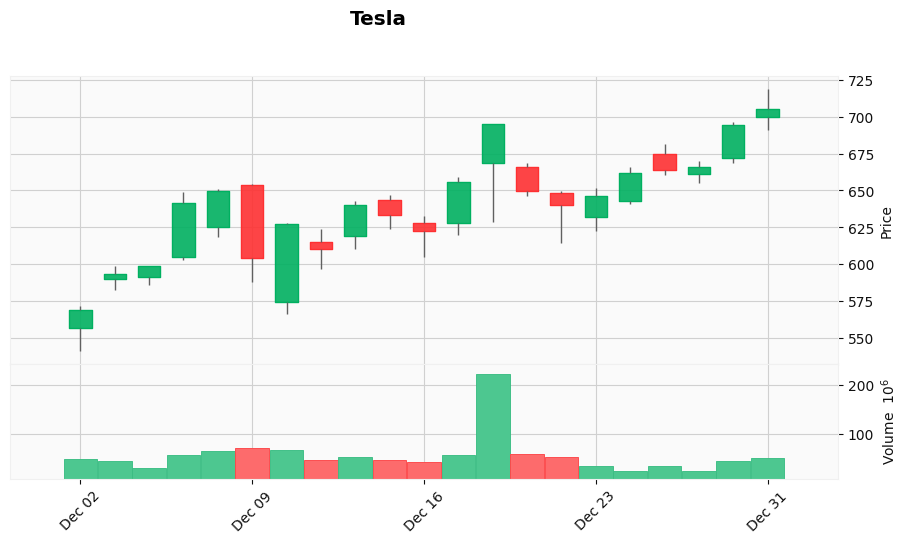

In [ ]:
mpf.plot(df[-21:],
         type='candle',
         volume=True,
         figratio=(16,8),
         style='yahoo',
         title='Tesla',
         mav=(10, 20))

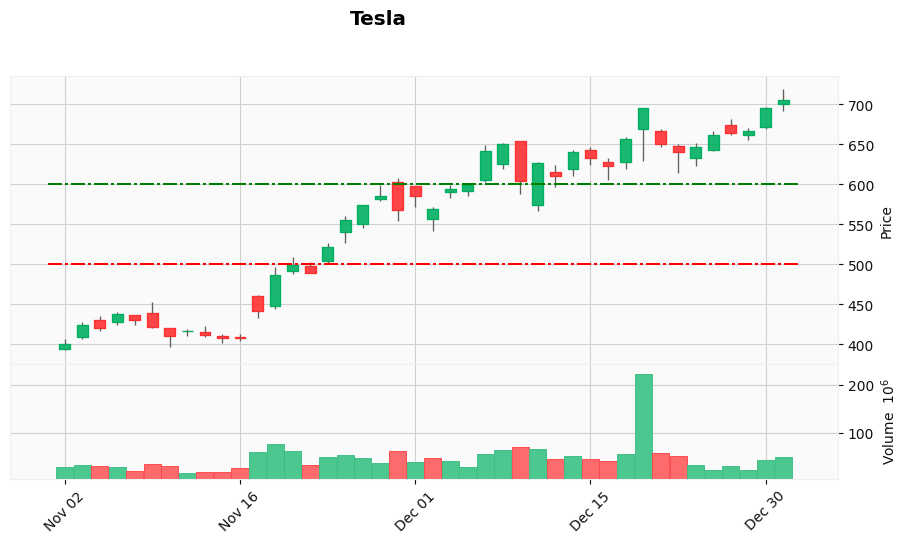

In [ ]:
mpf.plot(df[-42:],
         hlines=dict(hlines=[500, 600],colors=['red','green'],linestyle='-.'),
         type='candle', 
         volume=True, 
         figratio=(16, 8), 
         style='yahoo', 
         title='Tesla')

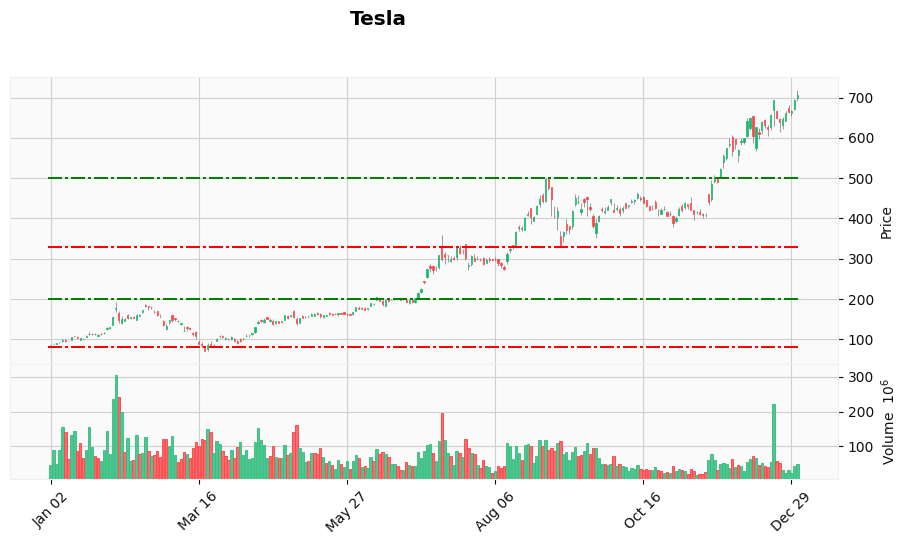

In [ ]:
mpf.plot(df,hlines=dict(hlines=[80,200,330,500],colors=['red','green','red','green'],linestyle='-.'),type='candle',volume=True, figratio=(16, 8), style='yahoo', title='Tesla')